<a href="https://colab.research.google.com/github/davidecopp/Model-Serie-A-2021-22/blob/main/SerieA_vsc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt

In [4]:
campionato = pd.read_csv('campionato_aggiornato26giornata.csv').drop('CRISI',axis = 1)
squadre = sorted(campionato['CASA'].unique().tolist())

In [5]:
x_plus_y = (campionato['X']+campionato['Y'])[0:180]
x_minus_y = (campionato['X']-campionato['Y'])[0:180]
S = np.zeros((180,21))
T = np.zeros((180,21))

for i in range(180):
  S[i][20] = 1
  T[i][20] = 1
  for j in range(20):
    if campionato['CASA'][i] == squadre[j]:
      S[i][j] = 1
      T[i][j] = 1
    if campionato['TRASFERTA'][i] == squadre[j]:
      S[i][j] = 1
      T[i][j] = -1

In [6]:
alfa = np.linalg.lstsq(S, x_plus_y, rcond = None)[0]
beta = np.linalg.lstsq(T, x_minus_y, rcond = None)[0]

lambdas_matrix = np.zeros((20,20,2))
for i in range(20):
  for j in range(20):
    if i != j:
      a = (alfa[i]+alfa[j]+alfa[20]+(beta[i]-beta[j]+beta[20]))/2
      b = (alfa[i]+alfa[j]+alfa[20]-(beta[i]-beta[j]+beta[20]))/2
      lambdas_matrix[i][j][0] = a
      lambdas_matrix[i][j][1] = b
      if a < 0:
        lambdas_matrix[i][j][0] = 0.25
      if b < 0:
        lambdas_matrix[i][j][1] = 0.25

In [7]:
#CREATION OF THE TABLE FROM THE FIRST 18 MATCHES OF EACH TEAM

Classifica_iniziale = pd.DataFrame(np.zeros((20,8)),columns = ['PG','V','P','S','GF','GS', 'DR','Punti'], index = squadre)  
for i in range(180):

  Classifica_iniziale['GF'][campionato['CASA'][i]] += campionato['X'][i]
  Classifica_iniziale['GF'][campionato['TRASFERTA'][i]] += campionato['Y'][i]
  Classifica_iniziale['GS'][campionato['CASA'][i]] += campionato['Y'][i]
  Classifica_iniziale['GS'][campionato['TRASFERTA'][i]] += campionato['X'][i]
  Classifica_iniziale['DR'][campionato['CASA'][i]] += campionato['X'][i]-campionato['Y'][i]
  Classifica_iniziale['DR'][campionato['TRASFERTA'][i]] += campionato['Y'][i]-campionato['X'][i]
  Classifica_iniziale['PG'][campionato['CASA'][i]] += 1
  Classifica_iniziale['PG'][campionato['TRASFERTA'][i]] += 1

  if campionato['X'][i] > campionato['Y'][i]:
    Classifica_iniziale['V'][campionato['CASA'][i]] += 1
    Classifica_iniziale['S'][campionato['TRASFERTA'][i]] += 1
    Classifica_iniziale['Punti'][campionato['CASA'][i]] += 3

  elif campionato['X'][i] < campionato['Y'][i]:
    Classifica_iniziale['V'][campionato['TRASFERTA'][i]] += 1
    Classifica_iniziale['S'][campionato['CASA'][i]] += 1
    Classifica_iniziale['Punti'][campionato['TRASFERTA'][i]] += 3 

  else:
    Classifica_iniziale['P'][campionato['CASA'][i]] += 1
    Classifica_iniziale['P'][campionato['TRASFERTA'][i]] += 1
    Classifica_iniziale['Punti'][campionato['CASA'][i]] += 1
    Classifica_iniziale['Punti'][campionato['TRASFERTA'][i]] += 1

Classifica_iniziale.sort_values(by = ['Punti','DR'], ascending = False).reset_index()


,index,PG,V,P,S,GF,GS,DR,Punti
0,Inter,18.0,13.0,4.0,1.0,48.0,15.0,33.0,43.0
1,Napoli,18.0,12.0,3.0,3.0,35.0,13.0,22.0,39.0
2,Milan,18.0,12.0,3.0,3.0,36.0,20.0,16.0,39.0
3,Atalanta,18.0,11.0,4.0,3.0,38.0,24.0,14.0,37.0
4,Roma,18.0,10.0,1.0,7.0,30.0,20.0,10.0,31.0
5,Fiorentina,18.0,10.0,1.0,7.0,33.0,24.0,9.0,31.0
6,Juventus,18.0,9.0,4.0,5.0,25.0,17.0,8.0,31.0
7,Lazio,18.0,8.0,4.0,6.0,36.0,33.0,3.0,28.0
8,Empoli,18.0,8.0,3.0,7.0,28.0,30.0,-2.0,27.0
9,Torino,18.0,7.0,4.0,7.0,23.0,18.0,5.0,25.0


In [8]:
#SIMULATION OF THE REMAINING 20 MATCHES OF EACH TEAM 

Classifica = Classifica_iniziale.copy()

for k in range(20):
  x_plus_y = (campionato['X']+campionato['Y'])[0:180+10*k]
  x_minus_y = (campionato['X']-campionato['Y'])[0:180+10*k]
  S = np.zeros((180+10*k,21))
  T = np.zeros((180+10*k,21))
  
  for i in range(180+10*k):
    S[i][20] = 1
    T[i][20] = 1
    for j in range(20):
      if campionato['CASA'][i] == squadre[j]:
        S[i][j] = 1
        T[i][j] = 1
      if campionato['TRASFERTA'][i] == squadre[j]:
        S[i][j] = 1
        T[i][j] = -1

  alfa = np.linalg.lstsq(S, x_plus_y, rcond = None)[0]
  beta = np.linalg.lstsq(T, x_minus_y, rcond = None)[0]

  lambdas_matrix = np.zeros((20,20,2))
  for i in range(20):
    for j in range(20):
      if i != j:
        a = (alfa[i]+alfa[j]+alfa[20]+(beta[i]-beta[j]+beta[20]))/2
        b = (alfa[i]+alfa[j]+alfa[20]-(beta[i]-beta[j]+beta[20]))/2
        lambdas_matrix[i][j][0] = a
        lambdas_matrix[i][j][1] = b
        if a < 0:
          lambdas_matrix[i][j][0] = 0.25
        if b < 0:
          lambdas_matrix[i][j][1] = 0.25

  for i in range(180+10*k,180+10*(k+1)):
    campionato['X'][i] = np.random.poisson(lam = lambdas_matrix[squadre.index(campionato['CASA'][i])][squadre.index(campionato['TRASFERTA'][i])][0])
    campionato['Y'][i] = np.random.poisson(lam = lambdas_matrix[squadre.index(campionato['TRASFERTA'][i])][squadre.index(campionato['CASA'][i])][1])

    Classifica['GF'][campionato['CASA'][i]] += campionato['X'][i]
    Classifica['GF'][campionato['TRASFERTA'][i]] += campionato['Y'][i]
    Classifica['GS'][campionato['CASA'][i]] += campionato['Y'][i]
    Classifica['GS'][campionato['TRASFERTA'][i]] += campionato['X'][i]
    Classifica['DR'][campionato['CASA'][i]] += campionato['X'][i]-campionato['Y'][i]
    Classifica['DR'][campionato['TRASFERTA'][i]] += campionato['Y'][i]-campionato['X'][i]
    Classifica['PG'][campionato['CASA'][i]] += 1
    Classifica['PG'][campionato['TRASFERTA'][i]] += 1

    if campionato['X'][i]>campionato['Y'][i]: #HOME TEAM WIN
      Classifica['V'][campionato['CASA'][i]] += 1
      Classifica['S'][campionato['TRASFERTA'][i]] += 1
      Classifica['Punti'][campionato['CASA'][i]] += 3

    elif campionato['X'][i]<campionato['Y'][i]: #AWAY TEAM WIN
      Classifica['V'][campionato['TRASFERTA'][i]] += 1
      Classifica['S'][campionato['CASA'][i]] += 1
      Classifica['Punti'][campionato['TRASFERTA'][i]] += 3 

    else: #DRAW
      Classifica['P'][campionato['CASA'][i]] += 1
      Classifica['P'][campionato['TRASFERTA'][i]] += 1
      Classifica['Punti'][campionato['CASA'][i]] += 1
      Classifica['Punti'][campionato['TRASFERTA'][i]] += 1
      
Classifica.sort_values(by = ['Punti','DR'], ascending = False).reset_index()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,PG,V,P,S,GF,GS,DR,Punti
0,Inter,38.0,21.0,10.0,7.0,86.0,47.0,39.0,73.0
1,Milan,38.0,20.0,9.0,9.0,65.0,42.0,23.0,69.0
2,Napoli,38.0,19.0,10.0,9.0,62.0,41.0,21.0,67.0
3,Juventus,38.0,17.0,13.0,8.0,53.0,35.0,18.0,64.0
4,Udinese,38.0,17.0,9.0,12.0,67.0,59.0,8.0,60.0
5,Roma,38.0,18.0,5.0,15.0,52.0,47.0,5.0,59.0
6,Fiorentina,38.0,16.0,8.0,14.0,70.0,64.0,6.0,56.0
7,Atalanta,38.0,14.0,11.0,13.0,58.0,62.0,-4.0,53.0
8,Empoli,38.0,15.0,8.0,15.0,55.0,61.0,-6.0,53.0
9,Verona,38.0,14.0,10.0,14.0,69.0,66.0,3.0,52.0


In [9]:
# N SIMULATIONS OF THE CHAMPIONSHIP 

N = 100
Punti = pd.DataFrame(np.zeros((N,20)), columns = squadre)
Risultato = pd.DataFrame(np.zeros((N,20)), columns = squadre)

for n in range(N):
  Classifica = Classifica_iniziale.copy()

  for k in range(20):
    x_plus_y = (campionato['X']+campionato['Y'])[0:180+10*k]
    x_minus_y = (campionato['X']-campionato['Y'])[0:180+10*k]
    S = np.zeros((180+10*k,21))
    T = np.zeros((180+10*k,21))
    
    for i in range(180+10*k):
      S[i][20] = 1
      T[i][20] = 1
      for j in range(20):
        if campionato['CASA'][i] == squadre[j]:
          S[i][j] = 1
          T[i][j] = 1
        if campionato['TRASFERTA'][i] == squadre[j]:
          S[i][j] = 1
          T[i][j] = -1

    alfa = np.linalg.lstsq(S, x_plus_y, rcond = None)[0]
    beta = np.linalg.lstsq(T, x_minus_y, rcond = None)[0]

    lambdas_matrix = np.zeros((20,20,2))
    for i in range(20):
      for j in range(20):
        if i != j:
          a = (alfa[i]+alfa[j]+alfa[20]+(beta[i]-beta[j]+beta[20]))/2
          b = (alfa[i]+alfa[j]+alfa[20]-(beta[i]-beta[j]+beta[20]))/2
          lambdas_matrix[i][j][0] = a
          lambdas_matrix[i][j][1] = b
          if a < 0:
            lambdas_matrix[i][j][0] = 0.25
          if b < 0:
            lambdas_matrix[i][j][1] = 0.25

    for i in range(180+10*k,180+10*(k+1)):
      campionato['X'][i] = np.random.poisson(lam = lambdas_matrix[squadre.index(campionato['CASA'][i])][squadre.index(campionato['TRASFERTA'][i])][0])
      campionato['Y'][i] = np.random.poisson(lam = lambdas_matrix[squadre.index(campionato['TRASFERTA'][i])][squadre.index(campionato['CASA'][i])][1])

      Classifica['GF'][campionato['CASA'][i]] += campionato['X'][i]
      Classifica['GF'][campionato['TRASFERTA'][i]] += campionato['Y'][i]
      Classifica['GS'][campionato['CASA'][i]] += campionato['Y'][i]
      Classifica['GS'][campionato['TRASFERTA'][i]] += campionato['X'][i]
      Classifica['DR'][campionato['CASA'][i]] += campionato['X'][i]-campionato['Y'][i]
      Classifica['DR'][campionato['TRASFERTA'][i]] += campionato['Y'][i]-campionato['X'][i]
      Classifica['PG'][campionato['CASA'][i]] += 1
      Classifica['PG'][campionato['TRASFERTA'][i]] += 1

      if campionato['X'][i] > campionato['Y'][i]: #HOME TEAM WIN
        Classifica['V'][campionato['CASA'][i]] += 1
        Classifica['S'][campionato['TRASFERTA'][i]] += 1
        Classifica['Punti'][campionato['CASA'][i]] += 3

      elif campionato['X'][i] < campionato['Y'][i]: #AWAY TEAM WIN
        Classifica['V'][campionato['TRASFERTA'][i]] += 1
        Classifica['S'][campionato['CASA'][i]] += 1
        Classifica['Punti'][campionato['TRASFERTA'][i]] += 3 

      else: #DRAW
        Classifica['P'][campionato['CASA'][i]] += 1
        Classifica['P'][campionato['TRASFERTA'][i]] += 1
        Classifica['Punti'][campionato['CASA'][i]] += 1
        Classifica['Punti'][campionato['TRASFERTA'][i]] += 1
        
  Classifica = Classifica.sort_values(by = ['Punti','DR'], ascending = False).reset_index()

  posizione = 1
  for team in Classifica['index']:
    Risultato[team][n] = posizione
    Punti[team][n] = Classifica['Punti'][posizione-1]
    posizione += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
Risultato

,Atalanta,Bologna,Cagliari,Empoli,Fiorentina,Genoa,Inter,Juventus,Lazio,Milan,Napoli,Roma,Salernitana,Sampdoria,Sassuolo,Spezia,Torino,Udinese,Venezia,Verona
0,3.0,15.0,16.0,12.0,8.0,17.0,1.0,4.0,7.0,2.0,9.0,5.0,19.0,20.0,6.0,18.0,11.0,13.0,14.0,10.0
1,3.0,12.0,19.0,13.0,4.0,17.0,2.0,6.0,7.0,1.0,5.0,9.0,20.0,14.0,10.0,18.0,11.0,15.0,16.0,8.0
2,1.0,7.0,20.0,11.0,2.0,16.0,3.0,8.0,17.0,4.0,5.0,6.0,19.0,14.0,9.0,18.0,12.0,10.0,13.0,15.0
3,4.0,10.0,17.0,15.0,5.0,19.0,1.0,8.0,6.0,3.0,2.0,9.0,20.0,13.0,14.0,18.0,7.0,11.0,12.0,16.0
4,7.0,11.0,18.0,3.0,10.0,12.0,1.0,9.0,5.0,4.0,2.0,6.0,16.0,20.0,8.0,17.0,14.0,15.0,13.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.0,13.0,18.0,12.0,3.0,19.0,1.0,7.0,6.0,2.0,4.0,9.0,20.0,11.0,10.0,16.0,5.0,15.0,17.0,14.0
96,3.0,6.0,20.0,8.0,7.0,16.0,1.0,5.0,13.0,2.0,4.0,9.0,19.0,10.0,14.0,18.0,12.0,11.0,17.0,15.0
97,4.0,8.0,17.0,13.0,14.0,18.0,3.0,7.0,5.0,1.0,6.0,2.0,20.0,10.0,9.0,16.0,12.0,15.0,19.0,11.0
98,1.0,15.0,18.0,13.0,9.0,20.0,3.0,5.0,8.0,2.0,4.0,6.0,16.0,19.0,12.0,17.0,11.0,10.0,14.0,7.0


In [11]:
Punti

,Atalanta,Bologna,Cagliari,Empoli,Fiorentina,Genoa,Inter,Juventus,Lazio,Milan,Napoli,Roma,Salernitana,Sampdoria,Sassuolo,Spezia,Torino,Udinese,Venezia,Verona
0,66.0,47.0,47.0,47.0,56.0,46.0,75.0,62.0,57.0,75.0,52.0,58.0,35.0,33.0,57.0,45.0,49.0,47.0,47.0,50.0
1,65.0,49.0,39.0,49.0,65.0,41.0,72.0,62.0,58.0,75.0,62.0,56.0,30.0,45.0,54.0,41.0,53.0,43.0,43.0,56.0
2,71.0,58.0,32.0,53.0,69.0,44.0,67.0,55.0,38.0,66.0,62.0,61.0,36.0,46.0,53.0,37.0,52.0,53.0,46.0,45.0
3,66.0,52.0,43.0,46.0,61.0,33.0,75.0,55.0,59.0,71.0,73.0,54.0,23.0,49.0,48.0,35.0,55.0,51.0,51.0,44.0
4,58.0,53.0,38.0,69.0,57.0,52.0,69.0,57.0,61.0,66.0,69.0,59.0,40.0,33.0,57.0,38.0,48.0,41.0,52.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54.0,50.0,41.0,50.0,68.0,40.0,74.0,54.0,55.0,68.0,60.0,52.0,35.0,51.0,52.0,43.0,58.0,48.0,43.0,49.0
96,62.0,59.0,27.0,58.0,58.0,48.0,77.0,60.0,50.0,63.0,60.0,51.0,39.0,50.0,49.0,42.0,50.0,50.0,42.0,48.0
97,67.0,57.0,42.0,47.0,44.0,41.0,68.0,58.0,61.0,77.0,60.0,71.0,37.0,50.0,53.0,42.0,47.0,43.0,41.0,48.0
98,79.0,46.0,34.0,47.0,58.0,28.0,68.0,62.0,59.0,71.0,62.0,61.0,41.0,34.0,47.0,36.0,52.0,53.0,46.0,60.0


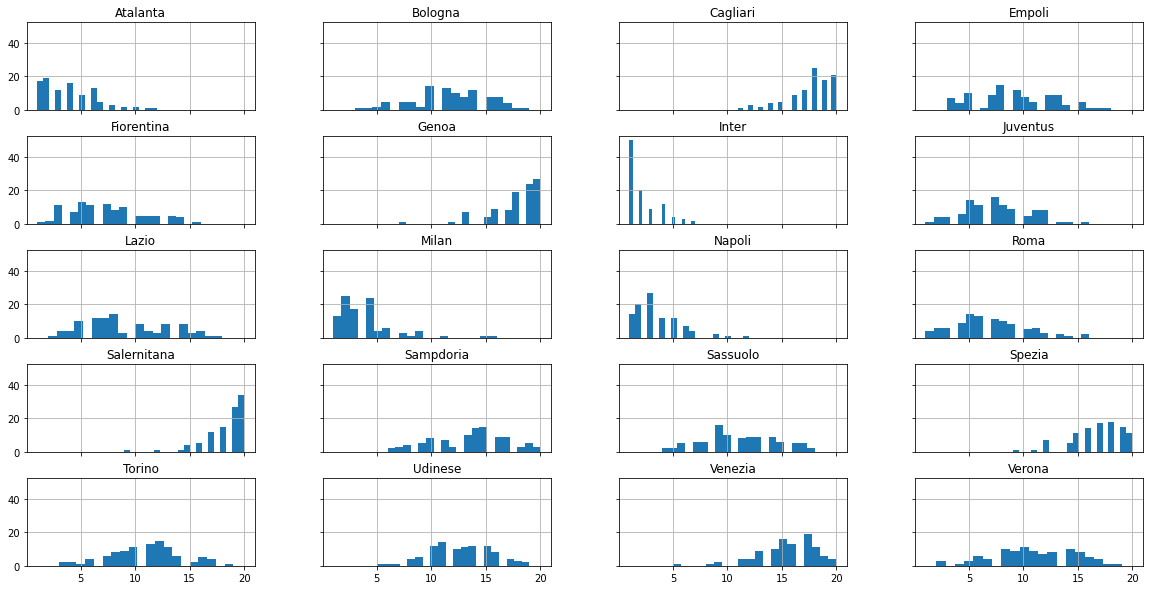

In [12]:
Risultato.hist(figsize=(20,10),sharex=True,sharey=True,bins=20)
plt.show()

In [14]:
#OUTCOMES FROM THE SIMULATIONS

Outcome = pd.DataFrame(columns=['Punti medi','Scudetto','Champions League','Serie B'], index = squadre, dtype=float)
for team in Risultato:
  Outcome['Punti medi'][team] = Punti[team].sum()/N
  Outcome['Scudetto'][team] = Risultato[team][Risultato[team] == 1].value_counts().sum()/N
  Outcome['Champions League'][team] = Risultato[team][Risultato[team] <= 4].value_counts().sum()/N
  Outcome['Serie B'][team] = Risultato[team][Risultato[team] >= 18].value_counts().sum()/N
Outcome

,Punti medi,Scudetto,Champions League,Serie B
Atalanta,65.31,0.17,0.64,0.00
Bologna,50.71,0.00,0.02,0.02
Cagliari,38.43,0.00,0.00,0.64
Empoli,54.82,0.00,0.11,0.01
Fiorentina,58.10,0.01,0.21,0.00
Genoa,37.68,0.00,0.00,0.70
Inter,70.37,0.50,0.91,0.00
Juventus,57.76,0.01,0.15,0.00
Lazio,55.16,0.00,0.09,0.01
Milan,66.10,0.13,0.79,0.00
